In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle

# Load data
df = pd.read_csv("balanced_dataset.csv")

In [3]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,160682,Male,45,1,11.0,0,> 2 Years,Yes,33927.0,12.0,191,1
1,8427,Female,24,1,36.0,0,< 1 Year,Yes,27977.0,152.0,65,1
2,107618,Male,71,1,46.0,0,> 2 Years,Yes,40188.0,124.0,237,1
3,5967,Male,44,1,45.0,1,1-2 Year,No,35773.0,26.0,158,0
4,274427,Female,41,1,28.0,1,1-2 Year,No,30540.0,124.0,122,0


In [4]:
# Drop 'id' column
df.drop(columns=['id'], inplace=True)

In [5]:
# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [6]:
# (Optional) Convert float columns to int if appropriate
df['Region_Code'] = df['Region_Code'].astype(int)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)

In [7]:
# Split into features and target
X = df.drop('Response', axis=1)
y = df['Response']

In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with best hyperparameters from GridSearchCV
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=150, random_state=42)

In [10]:
# Predict
y_pred = rf.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6144 3198]
 [ 641 8701]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.76      9342
           1       0.73      0.93      0.82      9342

    accuracy                           0.79     18684
   macro avg       0.82      0.79      0.79     18684
weighted avg       0.82      0.79      0.79     18684



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='f1',  # optimize for F1-score
                           n_jobs=-1,
                           verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.66      0.76      9342
           1       0.73      0.93      0.82      9342

    accuracy                           0.79     18684
   macro avg       0.82      0.79      0.79     18684
weighted avg       0.82      0.79      0.79     18684



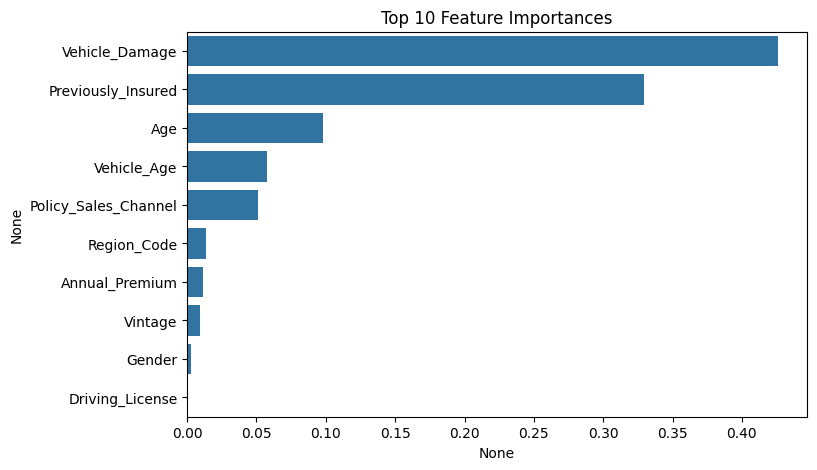

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feat_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Feature Importances")
plt.show()


In [11]:
import joblib

# Save the trained model to a file
joblib.dump(rf, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']